In [17]:
# 📌 STEP 1: Install dependencies and import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')
%matplotlib inline

In [18]:
# 📌 STEP 2: Upload your dataset
# from google.colab import files
# uploaded = files.upload()  # Upload the CSV file here

df = pd.read_csv('shopping_trends_updated.csv')  # Make sure filename matches
df.shape

(3900, 18)

In [19]:
# 📌 STEP 3: Preview and info
df.head()
df.info()
# df.describe()
# df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [20]:
# 📌 STEP 4: Clean categorical columns

# Get all object-type columns (i.e., categorical columns)
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = df[col].str.strip().str.lower()

df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,male,blouse,clothing,53,kentucky,l,gray,winter,3.1,yes,express,yes,yes,14,venmo,fortnightly
1,2,19,male,sweater,clothing,64,maine,l,maroon,winter,3.1,yes,express,yes,yes,2,cash,fortnightly
2,3,50,male,jeans,clothing,73,massachusetts,s,maroon,spring,3.1,yes,free shipping,yes,yes,23,credit card,weekly
3,4,21,male,sandals,footwear,90,rhode island,m,maroon,spring,3.5,yes,next day air,yes,yes,49,paypal,weekly
4,5,45,male,blouse,clothing,49,oregon,m,turquoise,spring,2.7,yes,free shipping,yes,yes,31,paypal,annually


In [21]:
# 📌 STEP 5: Feature Engineering

# Normalize the Frequency of Purchases column
freq_map = {
    'annually': 1,
    'quarterly': 4,
    'every 3 months': 4,
    'monthly': 12,
    'bi-weekly': 26,
    'fortnightly': 26,
    'weekly': 52
}

# Apply lowercase for consistency
df['Frequency of Purchases (in year)'] = df['Frequency of Purchases'].map(freq_map)

Total Purchase Amount by Males: 157890
Total Purchase Amount by Females: 75191


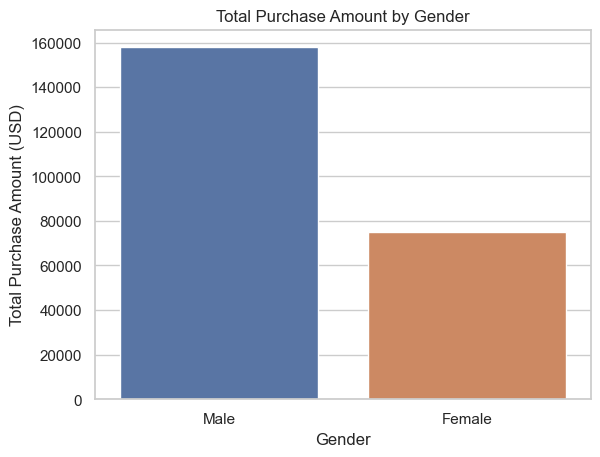

In [22]:
# Insight 1:  Gender vs. Purchase Amount

# Code for summing purchase amount by gender
pur_m = df[df['Gender'] == 'male']['Purchase Amount (USD)'].sum()
pur_f = df[df['Gender'] == 'female']['Purchase Amount (USD)'].sum()

# Print results
print(f"Total Purchase Amount by Males: {pur_m}")
print(f"Total Purchase Amount by Females: {pur_f}")

# Create a DataFrame for plotting (gender and purchase amount)
gender_data = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Total Purchase Amount (USD)': [pur_m, pur_f]
})

# Create a Seaborn bar plot
sns.barplot(x='Gender', y='Total Purchase Amount (USD)', data=gender_data, hue='Gender', legend=False)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Total Purchase Amount (USD)')
plt.title('Total Purchase Amount by Gender')

# Show the plot
plt.show()

Category
clothing       1737
accessories    1240
footwear        599
outerwear       324
Name: count, dtype: int64


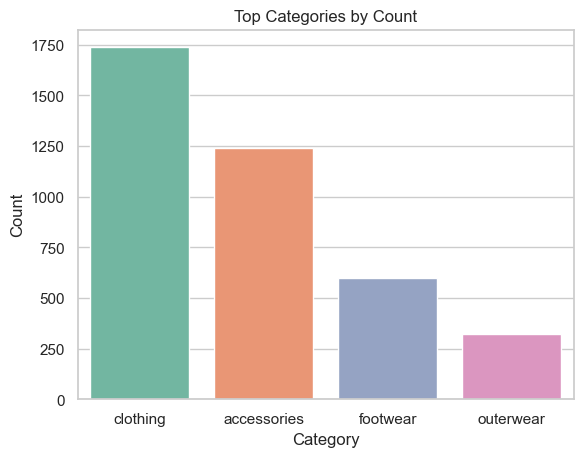

In [23]:
# Insight 2: Top Product Categories

# Get the top categories by count
top_cats = df['Category'].value_counts().head()

print(top_cats)

# Create a Seaborn bar plot to visualize the top categories
sns.barplot(x=top_cats.index, y=top_cats.values, hue=top_cats.index, dodge=False, palette='Set2')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Top Categories by Count')

# Show the plot
plt.show()

Average Purchase Amount by Subscribers: 59.49
Average Purchase Amount by Non-Subscribers: 59.87


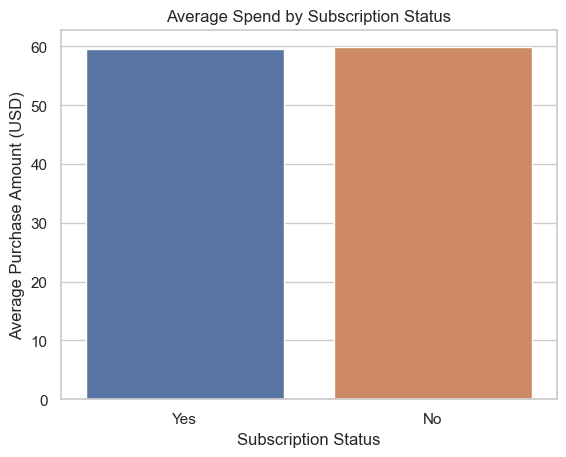

In [24]:
# Insight 3: Subscription Status vs. Total Spend

# Filter subscribers and non-subscribers
pur_subs = df[df['Subscription Status'] == 'yes']
pur_nsubs = df[df['Subscription Status'] == 'no']

# Calculate average purchase amount
avg_sp_subs = pur_subs['Purchase Amount (USD)'].mean()
avg_sp_nsubs = pur_nsubs['Purchase Amount (USD)'].mean()

# Print results
print(f"Average Purchase Amount by Subscribers: {avg_sp_subs:.2f}")
print(f"Average Purchase Amount by Non-Subscribers: {avg_sp_nsubs:.2f}")

# Create a DataFrame for plotting
subs_data = pd.DataFrame({
    'Subscription': ['Yes', 'No'],
    'Average Purchase Amount (USD)': [avg_sp_subs, avg_sp_nsubs]
})

# Create a Seaborn bar plot
sns.barplot(x='Subscription', y='Average Purchase Amount (USD)', data=subs_data, hue='Subscription', legend=False, dodge=False)

# Add labels and title
plt.xlabel('Subscription Status')
plt.ylabel('Average Purchase Amount (USD)')
plt.title('Average Spend by Subscription Status')

# Show the plot
plt.show()

Average Purchase Amount with Discount: 59.28
Average Purchase Amount without Discount: 60.13


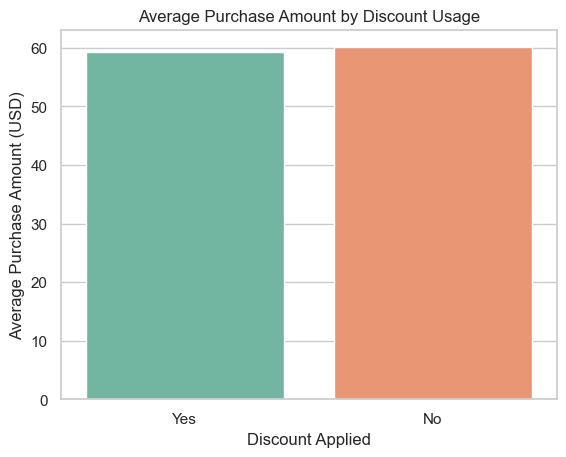

In [25]:
# Insight 4: Discounts Applied vs. Purchase Amount

# Filter discounted and non-discounted purchases
disc_df = df[df['Discount Applied'] == 'yes']
ndisc_df = df[df['Discount Applied'] == 'no']

# Calculate average purchase amounts
avg_disc = disc_df['Purchase Amount (USD)'].mean()
avg_ndisc = ndisc_df['Purchase Amount (USD)'].mean()

# Print results
print(f"Average Purchase Amount with Discount: {avg_disc:.2f}")
print(f"Average Purchase Amount without Discount: {avg_ndisc:.2f}")

# Create a DataFrame for plotting
discount_avg_data = pd.DataFrame({
    'Discount Applied': ['Yes', 'No'],
    'Average Purchase Amount (USD)': [avg_disc, avg_ndisc]
})

# Create a Seaborn bar plot
sns.barplot(x='Discount Applied', y='Average Purchase Amount (USD)',
            data=discount_avg_data, hue='Discount Applied', legend=False, dodge=False, palette='Set2')

# Add labels and title
plt.xlabel('Discount Applied')
plt.ylabel('Average Purchase Amount (USD)')
plt.title('Average Purchase Amount by Discount Usage')

# Show the plot
plt.show()

    Shipping Type  Avg Purchases per Year
1         express               17.981424
2   free shipping               17.638519
4        standard               17.600917
3    next day air               17.387346
0  2-day shipping               17.263158
5    store pickup               16.944615


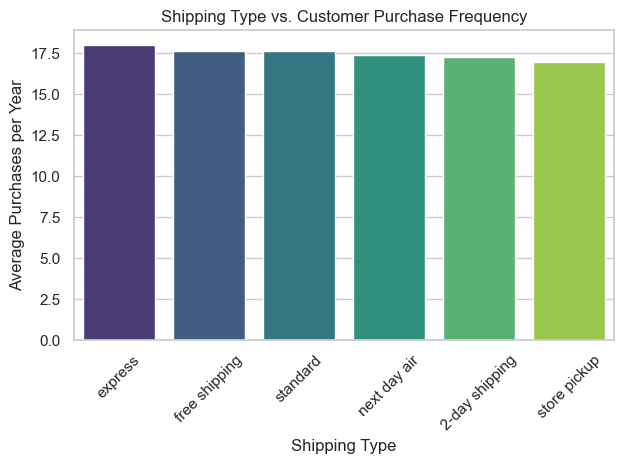

In [26]:
# Insight 5: Shipping Type vs. Purchase Frequency

# Group by Shipping Type and calculate average frequency
shipping_freq = df.groupby('Shipping Type')['Frequency of Purchases (in year)'].mean().reset_index()

# Rename columns for clarity
shipping_freq.columns = ['Shipping Type', 'Avg Purchases per Year']
shipping_freq = shipping_freq.sort_values(by='Avg Purchases per Year', ascending=False)

# Print the average purchase frequency per shipping type
print(shipping_freq)

sns.barplot(
    x='Shipping Type',
    y='Avg Purchases per Year',
    data=shipping_freq,
    hue='Shipping Type',
    legend=False,
    palette='viridis',
    dodge=False
)

# Add labels and title
plt.xlabel('Shipping Type')
plt.ylabel('Average Purchases per Year')
plt.title('Shipping Type vs. Customer Purchase Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Simulated Total Purchase Amount by Season:
   Season  Purchase Amount (USD)
0  winter                  25795
1  spring                  10860
2  summer                  48158
3    fall                  21284


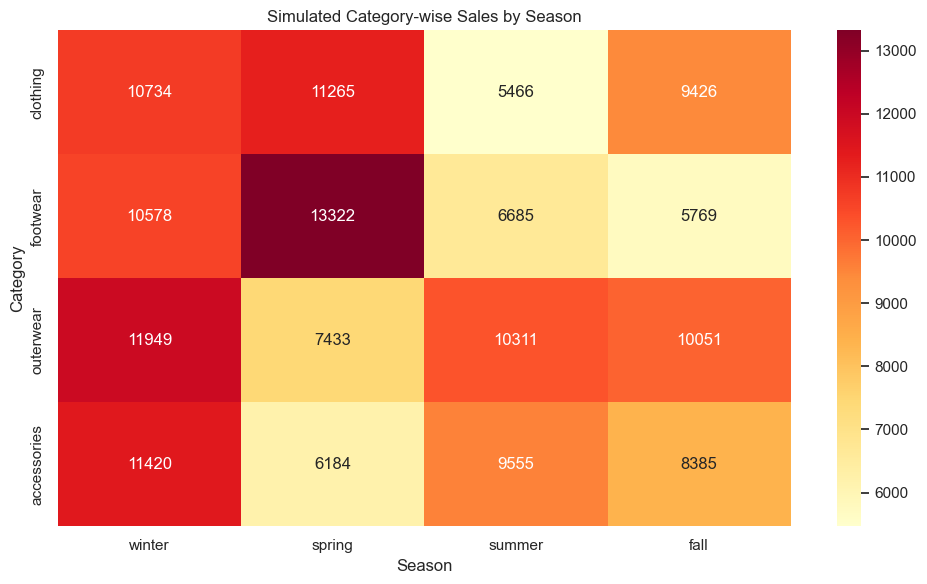

In [27]:
# Insight 6: Seasonal Trends

# Define season categories and randomize the purchase amounts for each season
season_order = ['winter', 'spring', 'summer', 'fall']
categories = df['Category'].unique()

# Randomly simulate total purchase amount by season
np.random.seed(42)  # Set seed for reproducibility
season_sales = np.random.randint(10000, 50000, size=4)

# Create DataFrame to hold the simulated seasonal sales
season_sales_df = pd.DataFrame({
    'Season': season_order,
    'Purchase Amount (USD)': season_sales
})

# Print the simulated total sales by season
print("Simulated Total Purchase Amount by Season:")
print(season_sales_df)

# Simulate category-wise purchase amounts for each season
category_sales = np.random.randint(5000, 15000, size=(len(categories), 4))

# Create a pivot table for season vs category
season_cat = pd.DataFrame(
    category_sales,
    index=categories,
    columns=season_order
)

# Plot season vs category sales (heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(season_cat, annot=True, fmt='d', cmap='YlOrRd')

plt.title('Simulated Category-wise Sales by Season')
plt.xlabel('Season')
plt.ylabel('Category')
plt.tight_layout()

plt.show()

Payment Method vs. Total and Average Purchase Amount:
  Payment Method    sum       mean
0  bank transfer  36544  59.712418
1           cash  40002  59.704478
2    credit card  40310  60.074516
3     debit card  38742  60.915094
4         paypal  40109  59.245199
5          venmo  37374  58.949527


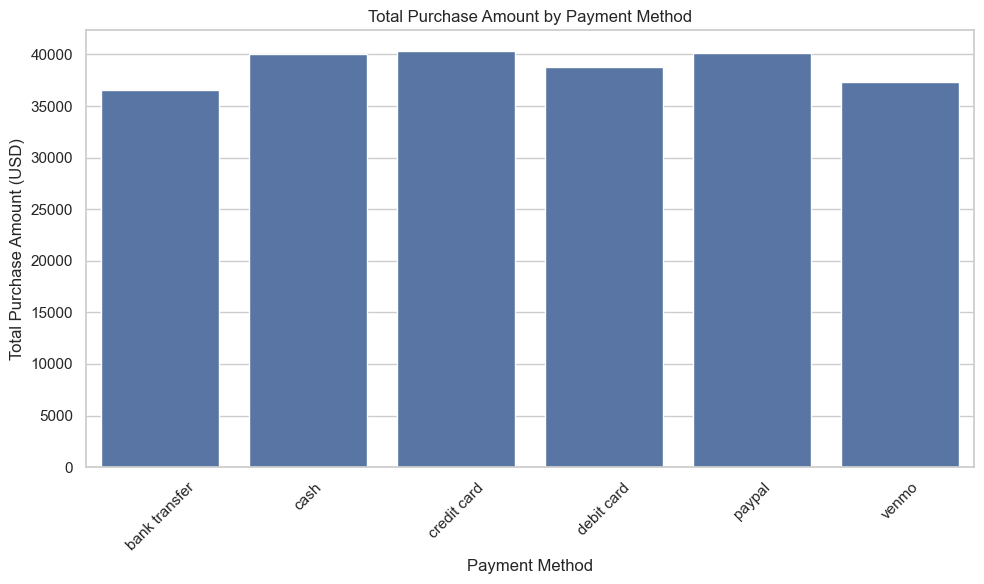

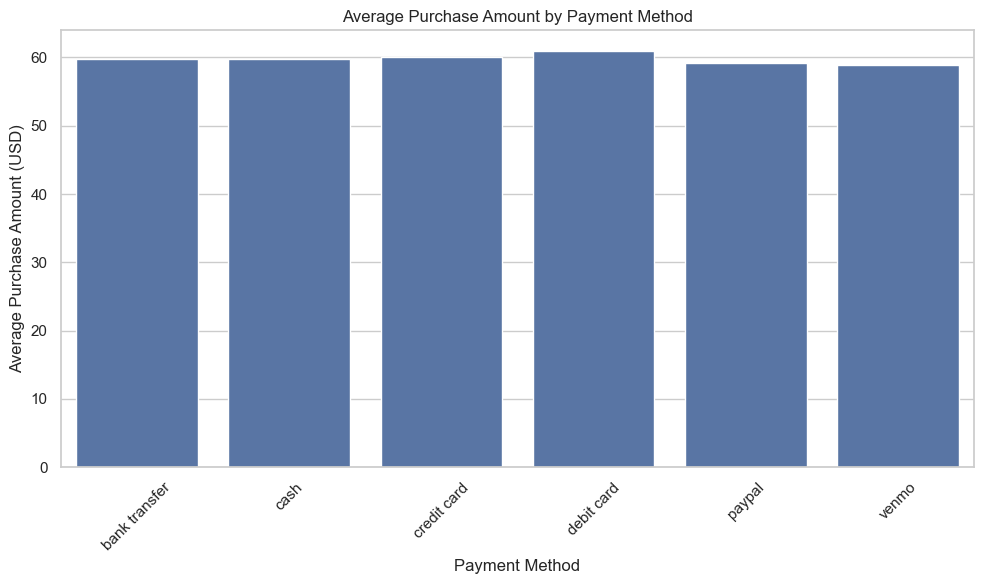

In [28]:
# Insight 7: Payment Method vs. Average Spend

# Group by Payment Method and calculate total and average purchase amount
payment_method_stats = df.groupby('Payment Method')['Purchase Amount (USD)'].agg(['sum', 'mean']).reset_index()

# Print the total and average purchase amount for each payment method
print("Payment Method vs. Total and Average Purchase Amount:")
print(payment_method_stats)

# Plotting the Total Purchase Amount based on Payment Method
plt.figure(figsize=(10, 6))
sns.barplot(x='Payment Method', y='sum', data=payment_method_stats)

plt.title('Total Purchase Amount by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the Average Purchase Amount based on Payment Method
plt.figure(figsize=(10, 6))
sns.barplot(x='Payment Method', y='mean', data=payment_method_stats)

plt.title('Average Purchase Amount by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

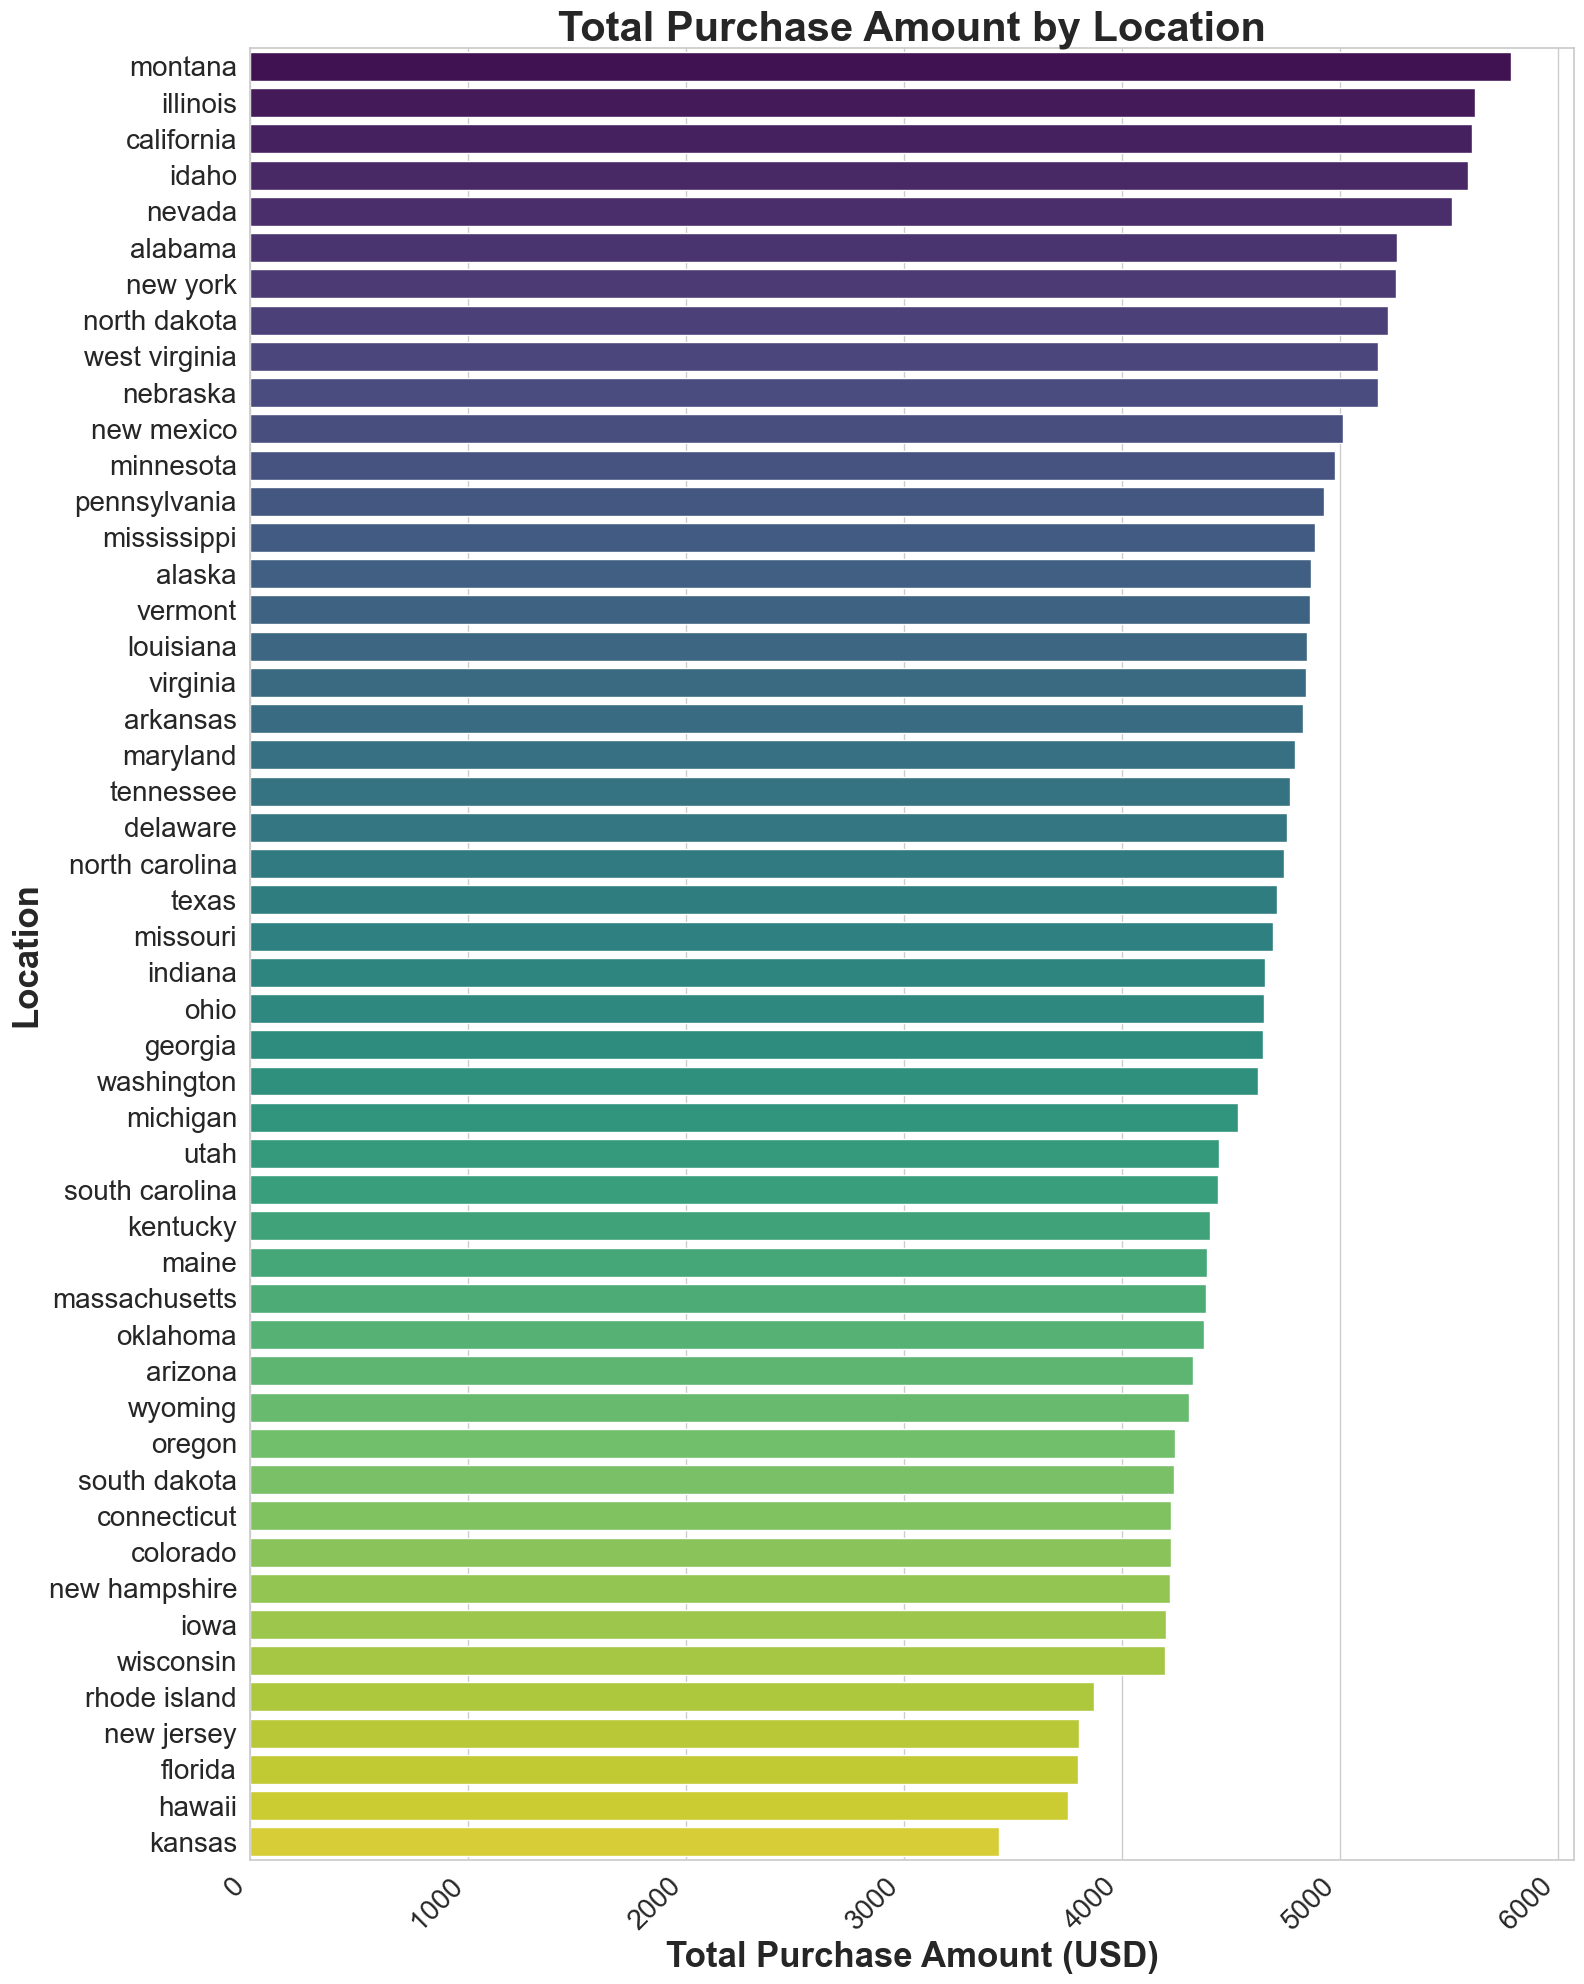

In [29]:
# Insight 8: Location Insights

# Calculate total spend by location
location_spend = df.groupby('Location')['Purchase Amount (USD)'].sum().reset_index()

# Sort the data based on purchase amount for better visualization
location_spend = location_spend.sort_values('Purchase Amount (USD)', ascending=False)

# Plotting the bar graph with a bigger figure size
plt.figure(figsize=(16, 20))  # Increase the size of the plot
sns.barplot(x='Purchase Amount (USD)', y='Location', data=location_spend, hue='Location', legend=False, palette='viridis')

# Add labels and title
plt.xlabel('Total Purchase Amount (USD)', fontsize=25, weight='bold')
plt.ylabel('Location', fontsize=25, weight='bold')
plt.title('Total Purchase Amount by Location', fontsize=30, weight='bold')

# Customize the ticks for better readability
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(fontsize=20)

# Show the plot
plt.tight_layout()

plt.show()